In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

## 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

x1 x2
euclidean 7.483314773547883
square euclidean 56.0
chebyshev 6.0
hemming 12.0
x1 x3
euclidean 9.433981132056603
square euclidean 88.99999999999999
chebyshev 8.0
hemming 15.0
x1 x4
euclidean 12.409673645990857
square euclidean 154.0
chebyshev 9.0
hemming 20.0
x2 x3
euclidean 10.04987562112089
square euclidean 101.0
chebyshev 9.0
hemming 15.0
x2 x4
euclidean 12.083045973594572
square euclidean 146.0
chebyshev 9.0
hemming 20.0
x3 x4
euclidean 5.0
square euclidean 25.0
chebyshev 5.0
hemming 5.0


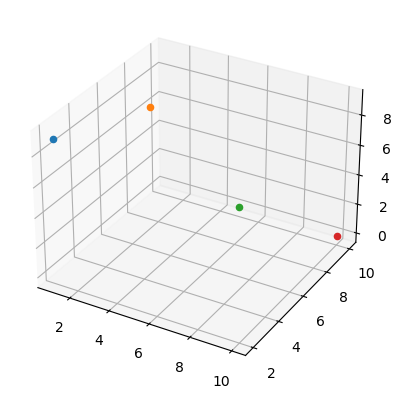

In [29]:


x1 = np.array([1, 2, 3])
x2 = np.array([3, 6, 9])
x3 = np.array([5, 10, 0])
x4 = np.array([10, 10, 0])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1[0], x1[1], x2[2])
ax.scatter(x2[0], x2[1], x2[2])
ax.scatter(x3[0], x3[1], x3[2])
ax.scatter(x4[0], x4[1], x4[2])

x_m = np.array([x1, x2, x3, x4])

for i in range(len(x_m)):
    for j in range(i + 1, len(x_m)):
        print('x' + str(i + 1), 'x' + str(j + 1))
        # euclidean
        print("euclidean",  np.linalg.norm(x_m[i] - x_m[j]))
        # square euclidean
        print("square euclidean", np.linalg.norm(x_m[i] - x_m[j])**2)
        # chebyshev
        print("chebyshev", np.linalg.norm(x_m[i] - x_m[j], ord=np.inf))
        # hemming
        print("hemming", np.linalg.norm(x_m[i] - x_m[j], ord=1))

## 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания необходимо использовать функцию arange.

In [30]:
z = np.zeros((5,5))
z += np.arange(5)

print(z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


## 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.	Установите другое количество ближайших соседей (k = 1, 5, 10).
2.	Установите размер тестовой выборки 15% от всего датасета.
3.	Постройте графики и оцените качество моделей, проанализируйте результаты.


In [31]:


iris = sns.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)

model1 = KNeighborsClassifier(n_neighbors = 1)
model2 = KNeighborsClassifier(n_neighbors = 5)
model3 = KNeighborsClassifier(n_neighbors = 10)

In [32]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

first accuracy: 0.957
second accuracy: 0.957
third accuracy: 1.0


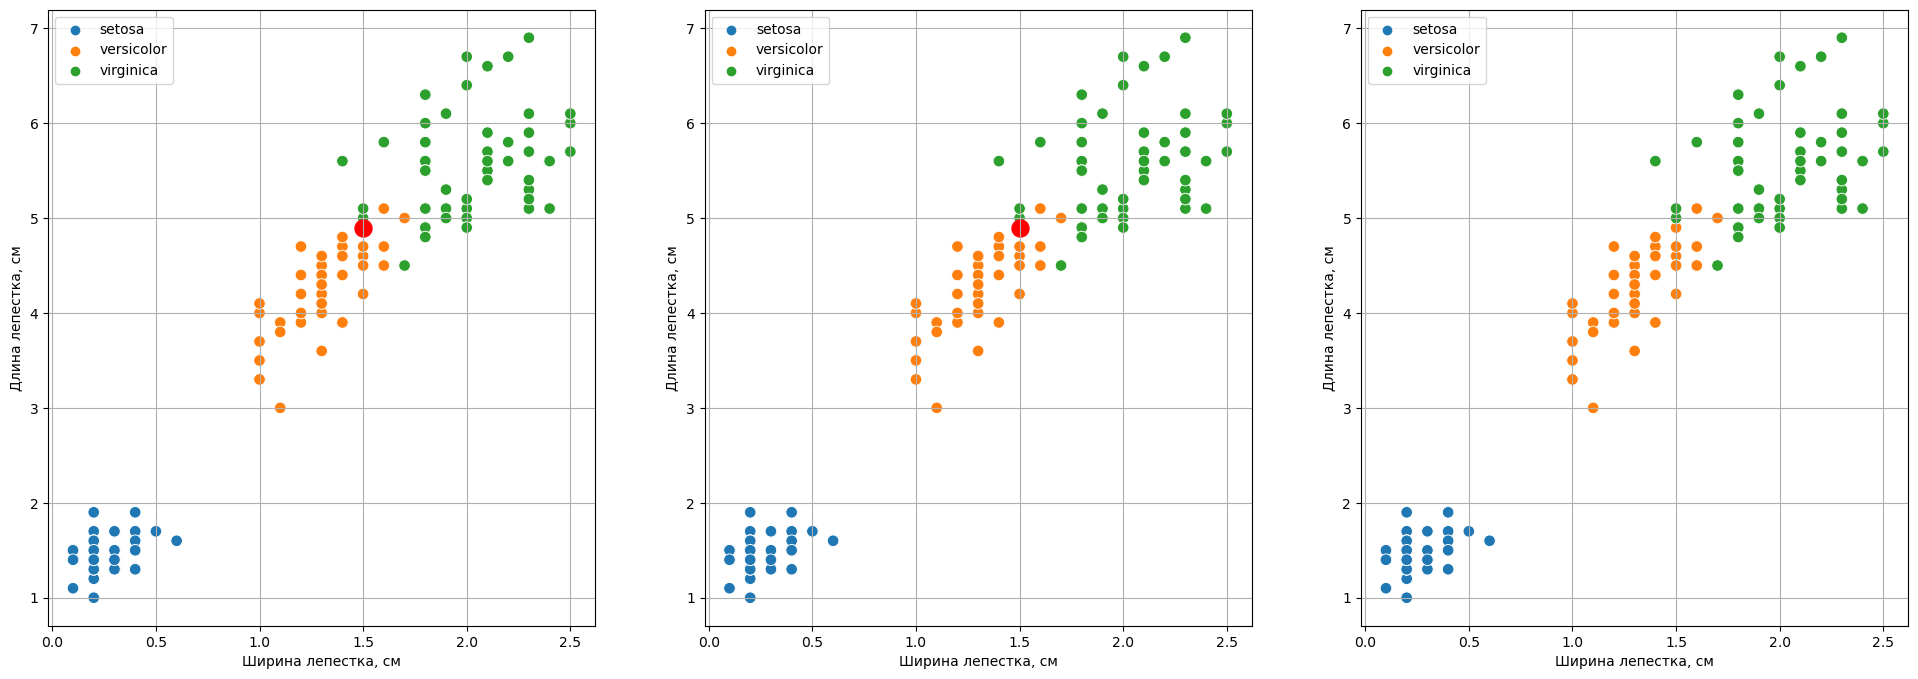

In [33]:
plt.figure(figsize=(24, 8))

plt.subplot(131)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred1[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'first accuracy: {accuracy_score(y_test, y_pred1) :.3}')

plt.subplot(132)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred1[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'second accuracy: {accuracy_score(y_test, y_pred2) :.3}')

plt.subplot(133)
sns.scatterplot(
    data=iris,
    x='petal_width', y='petal_length',
    hue='species',
    s=70
)
plt.ylabel('Длина лепестка, см')
plt.xlabel('Ширина лепестка, см')
plt.legend()
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred3[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print(f'third accuracy: {accuracy_score(y_test, y_pred3) :.3}')

In [34]:


data_dict = [{"цвет глаз": 1, "рост": 152},
              {"вес": 65, "рост": 166},
              {"цвет глаз": 2, "рост": 164},
              {"вес": 55, "цвет глаз": 2}]

dict_vectorizer = DictVectorizer(sparse=False)

features = dict_vectorizer.fit_transform(data_dict)
features

array([[  0., 152.,   1.],
       [ 65., 166.,   0.],
       [  0., 164.,   2.],
       [ 55.,   0.,   2.]])